<span style="color:blue">**Using Machine Learning to Predict Carbon Footprint:<br> Project Resumme**</span><br>





<img src="/Users/miguelopez/Desktop/4-Proyecto ML/img/carbon.png" width="500">

<span style="color:blue">**INTRODUCTION**</span><br>

In this notebook, i will explore various models to determine whether this dataset is better suited for supervised or unsupervised learning. The goal is to identify the most effective method for developing carbon emission-friendly solutions and commercial applications. By the end of this analysis, we aim to have a clear understanding of the best approach for further development.

In [5]:
# Libraries
import pandas as pd
import os # operating system    
import matplotlib.pyplot as plt
import numpy as np  
import seaborn as sns   


* Carbon Emission.csv contains 10000 rows and 20 columns covering demographic, behavioral, and environmental attributes, this is a sizable, clean dataset with a diverse set of features applicable for understanding consumer environmental impacts and segmentation analysis. The lack of missing data makes it readily reletively usable for machine learning modeling and statistical analysis.
* Different momdels will be evaluated, including: Linear Regression, Random Forest, Kmeans, and a quick look to Keras Neural Network.






<span style="color:blue">**DATA CLEANING**</span><br>

In [6]:
#  original dataset 
df = pd.read_csv('/Users/miguelopez/Desktop/4-Proyecto ML/src/data_raw/Carbon Emission.csv')  
df


,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission
0,overweight,female,pescatarian,daily,coal,public,NaN,often,230,frequently,210,large,4,7,26,1,No,['Metal'],"['Stove', 'Oven']",2238
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,NaN,often,114,rarely,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,2472,small,1,14,47,6,Sometimes,['Metal'],"['Oven', 'Microwave']",2595
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,NaN,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",1074
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,8457,large,1,3,5,6,Yes,['Paper'],['Oven'],4743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,obese,male,omnivore,twice a day,coal,private,hybrid,sometimes,230,never,268,medium,5,12,27,9,Yes,[],['Microwave'],2408
9996,normal,female,vegan,twice a day,coal,private,lpg,never,234,frequently,5316,extra large,3,14,8,24,Sometimes,"['Paper', 'Plastic']","['Stove', 'Microwave']",3084
9997,overweight,female,vegetarian,daily,electricity,walk/bicycle,NaN,sometimes,298,very frequently,96,extra large,5,11,5,24,Yes,"['Paper', 'Plastic', 'Metal']","['Microwave', 'Grill', 'Airfryer']",2377
9998,underweight,male,vegan,more frequently,coal,private,petrol,often,179,rarely,8688,medium,5,19,14,5,Sometimes,"['Paper', 'Metal']","['Stove', 'Microwave', 'Grill', 'Airfryer']",4574


In [8]:
# clean /scaled data set 
df2= pd.read_csv('/Users/miguelopez/Desktop/4-Proyecto ML/src/data_processed/df_final.csv')
df2.tail()

,Unnamed: 0,Monthly Grocery Bill,Vehicle Monthly Distance Km,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,CarbonEmission,Body Type_normal,Body Type_obese,...,Cooking_With_['Oven'],"Cooking_With_['Stove', 'Grill', 'Airfryer']","Cooking_With_['Stove', 'Microwave', 'Grill', 'Airfryer']","Cooking_With_['Stove', 'Microwave']","Cooking_With_['Stove', 'Oven', 'Grill', 'Airfryer']","Cooking_With_['Stove', 'Oven', 'Microwave', 'Grill', 'Airfryer']","Cooking_With_['Stove', 'Oven', 'Microwave']","Cooking_With_['Stove', 'Oven']",Cooking_With_['Stove'],Cooking_With_[]
9995,9995,0.722892,0.026803,0.666667,0.500000,0.54,0.375000,0.260439,0,1,...,0,0,0,0,0,0,0,0,0,0
9996,9996,0.738956,0.531653,0.333333,0.583333,0.16,1.000000,0.344195,1,0,...,0,0,0,1,0,0,0,0,0,0
9997,9997,0.995984,0.009601,0.666667,0.458333,0.10,1.000000,0.256598,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,9998,0.518072,0.868887,0.666667,0.791667,0.28,0.208333,0.528807,0,0,...,0,0,1,0,0,0,0,0,0,0
9999,9999,0.261044,0.995300,0.500000,0.458333,0.12,0.000000,0.064428,0,1,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Correlations  
df2.corr(numeric_only=True) 


,Unnamed: 0,Monthly Grocery Bill,Vehicle Monthly Distance Km,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,CarbonEmission,Body Type_normal,Body Type_obese,...,Cooking_With_['Oven'],"Cooking_With_['Stove', 'Grill', 'Airfryer']","Cooking_With_['Stove', 'Microwave', 'Grill', 'Airfryer']","Cooking_With_['Stove', 'Microwave']","Cooking_With_['Stove', 'Oven', 'Grill', 'Airfryer']","Cooking_With_['Stove', 'Oven', 'Microwave', 'Grill', 'Airfryer']","Cooking_With_['Stove', 'Oven', 'Microwave']","Cooking_With_['Stove', 'Oven']",Cooking_With_['Stove'],Cooking_With_[]
Unnamed: 0,1.000000,0.012468,-0.013988,-0.005508,0.000441,-0.002757,-0.004883,-0.012765,-0.008341,0.009190,...,-0.004876,0.001267,0.003913,0.012438,0.012698,0.006004,0.005479,-0.010514,0.003524,-0.014678
Monthly Grocery Bill,0.012468,1.000000,0.015801,0.002343,-0.010318,0.006746,0.012798,0.081587,0.025083,-0.006436,...,-0.016601,-0.005168,0.001769,-0.004987,0.010669,0.009810,0.009470,0.009079,0.004649,-0.013602
Vehicle Monthly Distance Km,-0.013988,0.015801,1.000000,-0.001730,-0.003943,0.004934,-0.003497,0.594171,-0.008366,0.008982,...,0.004093,-0.002293,0.002248,-0.014886,-0.017723,-0.010377,-0.004510,0.017809,0.011046,-0.012479
Waste Bag Weekly Count,-0.005508,0.002343,-0.001730,1.000000,-0.011640,-0.003254,-0.005335,0.159193,0.001882,-0.005976,...,-0.013032,-0.005685,0.008540,0.020264,0.007288,-0.004253,0.003014,-0.007532,-0.009880,0.002990
How Long TV PC Daily Hour,0.000441,-0.010318,-0.003943,-0.011640,1.000000,0.009414,0.006804,0.012985,0.004069,-0.002112,...,0.015412,-0.001590,0.006341,0.000814,-0.003089,-0.002574,-0.020675,-0.010315,-0.009516,-0.003307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Cooking_With_['Stove', 'Oven', 'Microwave', 'Grill', 'Airfryer']",0.006004,0.009810,-0.010377,-0.004253,-0.002574,0.011354,0.002906,0.019397,-0.009994,0.016785,...,-0.066306,-0.067519,-0.068885,-0.067347,-0.065664,1.000000,-0.067519,-0.069897,-0.066190,-0.066073
"Cooking_With_['Stove', 'Oven', 'Microwave']",0.005479,0.009470,-0.004510,0.003014,-0.020675,-0.006351,0.016973,-0.004261,-0.001246,-0.002856,...,-0.065805,-0.067008,-0.068364,-0.066837,-0.065167,-0.067519,1.000000,-0.069368,-0.065689,-0.065573
"Cooking_With_['Stove', 'Oven']",-0.010514,0.009079,0.017809,-0.007532,-0.010315,-0.006232,-0.001522,0.007820,-0.004349,0.018012,...,-0.068122,-0.069368,-0.070772,-0.069191,-0.067463,-0.069897,-0.069368,1.000000,-0.068003,-0.067883
Cooking_With_['Stove'],0.003524,0.004649,0.011046,-0.009880,-0.009516,0.011074,-0.012503,0.005759,-0.005460,0.011382,...,-0.064509,-0.065689,-0.067018,-0.065521,-0.063885,-0.066190,-0.065689,-0.068003,1.000000,-0.064283


Most of the correlations between the columns and the target variable CarbonEmission are relatively low, with the highest being 0.594171 between Vehicle Monthly Distance Km and CarbonEmission.

This can make it more challenging to train accurate machine learning models because with low correlations, the input features have less predictive power on their own to explain variations in the target variable. Linear/logistic regression for example, rely on detecting these linear relationships.

This means the model will have to to work harder to find more complex non-linear relationships and interactions between features to make accurate predictions.

However with Feature engineering can be used to transform the inputs to create new features that are more correlated to the target.Moreover,  neural networks can detect non-linear relationships even with low correlations. Also,Combining multiple low correlation features can provide more predictive power than a single feature.

Evaluating different ML algorithms and feature transformations will be needed to determine if accurate models can be trained on this data. But low correlations should set expectations that it may be more difficult.



 

**First glance to Rsquare and Mae results :**


**r_squared values:<br>**

       Regression Algorithms    Result<br>
0          Linear Regression  0.605501<br>
1   Decision Tree Regression  0.803326<br>
2  Support Vector Regression  0.105251<br>
3   Random Forest Classifier  0.912003<br>
4             XGB Regression  0.975728<br>

**Mean Absolute Errors values:**

       Regression Algorithms      Result
0          Linear Regression  524.908445<br>
1   Decision Tree Regression  350.453000<br>
2  Support Vector Regression  725.583154<br>
3   Random Forest Classifier  233.822410<br>
4             XGB Regression  120.023525<br>










 <span style="color:blue">**LINEAR REGRESSION**</span><br>

**Linear Regression Metrics**<br>

R2:  0.5666939660261912<br>
MAE:  540.7563708130575<br>
MSE:  459973.4219828679<br>
RMSE:  678.2134044553144<br>

The R^2 of 0.57 explains about 57% of the variance in the training data. This is decent but could be improved with  tuning.<br>

The errors like MAE, MSE, and RMSE are fairly large numbers. This means the model is not perfectly fitting the training data .<br>

Next step was Ridge and Lasso Regression and cross validation to improve the model.<br>






****Ridge and Lasso Regression alpha =10****

Ridge R-squared: 0.5563044399763416<br>
Lasso R-squared: 0.5563042480688583<br>
Ridge MAE: 540.1196786720105<br>
Lasso MAE: 540.1112070267635<br>
Ridge RMSE: 677.8444377824953<br>
Lasso RMSE: 677.8445843733313<br>
Ridge MSE: 459473.0818326672<br>
Lasso MSE: 459473.2805642542<br>

**Five fold cross Validation**<br>

Cross-validation scores: [0.52477419 0.58313746 0.57090846 0.53234366 0.54742185]<br>
Average cross-validation score:  0.5517171238996029<br>
R-squared of cross-validation score:  0.3043917848040498<br>
rmse of cross-validation score:  0.7427766312287988<br>
mse of cross-validation score:  0.5517171238996029<br>

the average CV score shows that, on average, the model explains about 55.17% of the variance in the target variable across different folds.<br>
The R-squared of the CV indicates that the model captures around 30.44% of the variability in the target variable.<br>


The CV RMSE is approximately 0.7428, which means that, on average, the model’s predictions deviate from the actual values by about 0.7428 units.

the CV MSE is approximately 0.5517, reflecting the average squared error between predictions and actual values.


Applying Ridge/Lasso regularization helped reduce overfitting slightly, as evidenced by the metrics improving a bit.  The R^2 values for both Ridge and Lasso are very similar, around 0.556. This is comparable to the R^2 of 0.567 before regularization.

Conclusion: <BR>
The MAE, RMSE, and MSE metrics have decreased slightly for both Ridge and Lasso compared to the non-regularized model.
The model is still overfitting somewhat. 
The following step was implementing a decission tree regression model to check if it improves the predictions. 






<span style="color:blue">**DECISSION TREE RESULTS**</span><br>

Mean Absolute Error (MAE): 0.02702759137653327<br>
Mean Squared Error (MSE): 0.001265184343328195<br>
Root Mean Squared Error (RMSE): 0.03556942989883581<br>
R-squared (R2 ): 0.9207321681134875<br>

The model explains now around 92.07% of the variance in the target variable. Seems like a good fit.
The estimate to handle unseen data is 0.5517,so it works reasonably well across different folds.<br>
However, R2 indicates posiible overfitting.<br> 

**Conclussion:<br>**


The decision tree model outperforms previous both ridge and lasso regression in terms of R-squared (R²), indicating better fit to the data.
However, the decision tree model still exhibits some variability (as seen in the RMSE and MSE) because it is non linear, bedise, the model is prone to overfitting as indicated by the high R2 value.


The main issue here is that Carbon Emission is mathematically linked, or dependent, to the independent variables (features), so it could be the explanation for the overfitting, hence unreliable predictions. This data set could be too complex for the previous models.

The next step forward would be to try unsupervised machine learning model, perhaps with Kmeans, to cluster the data into groups and analyze the clusters to gain insights. This may provide a better understanding of the relationships between features and the target variable without, necessarily, predicting it directly.

<span style="color:blue">**NO SUPERVISED: KMEANS MODEL**</span><br>


Variables of interest: 
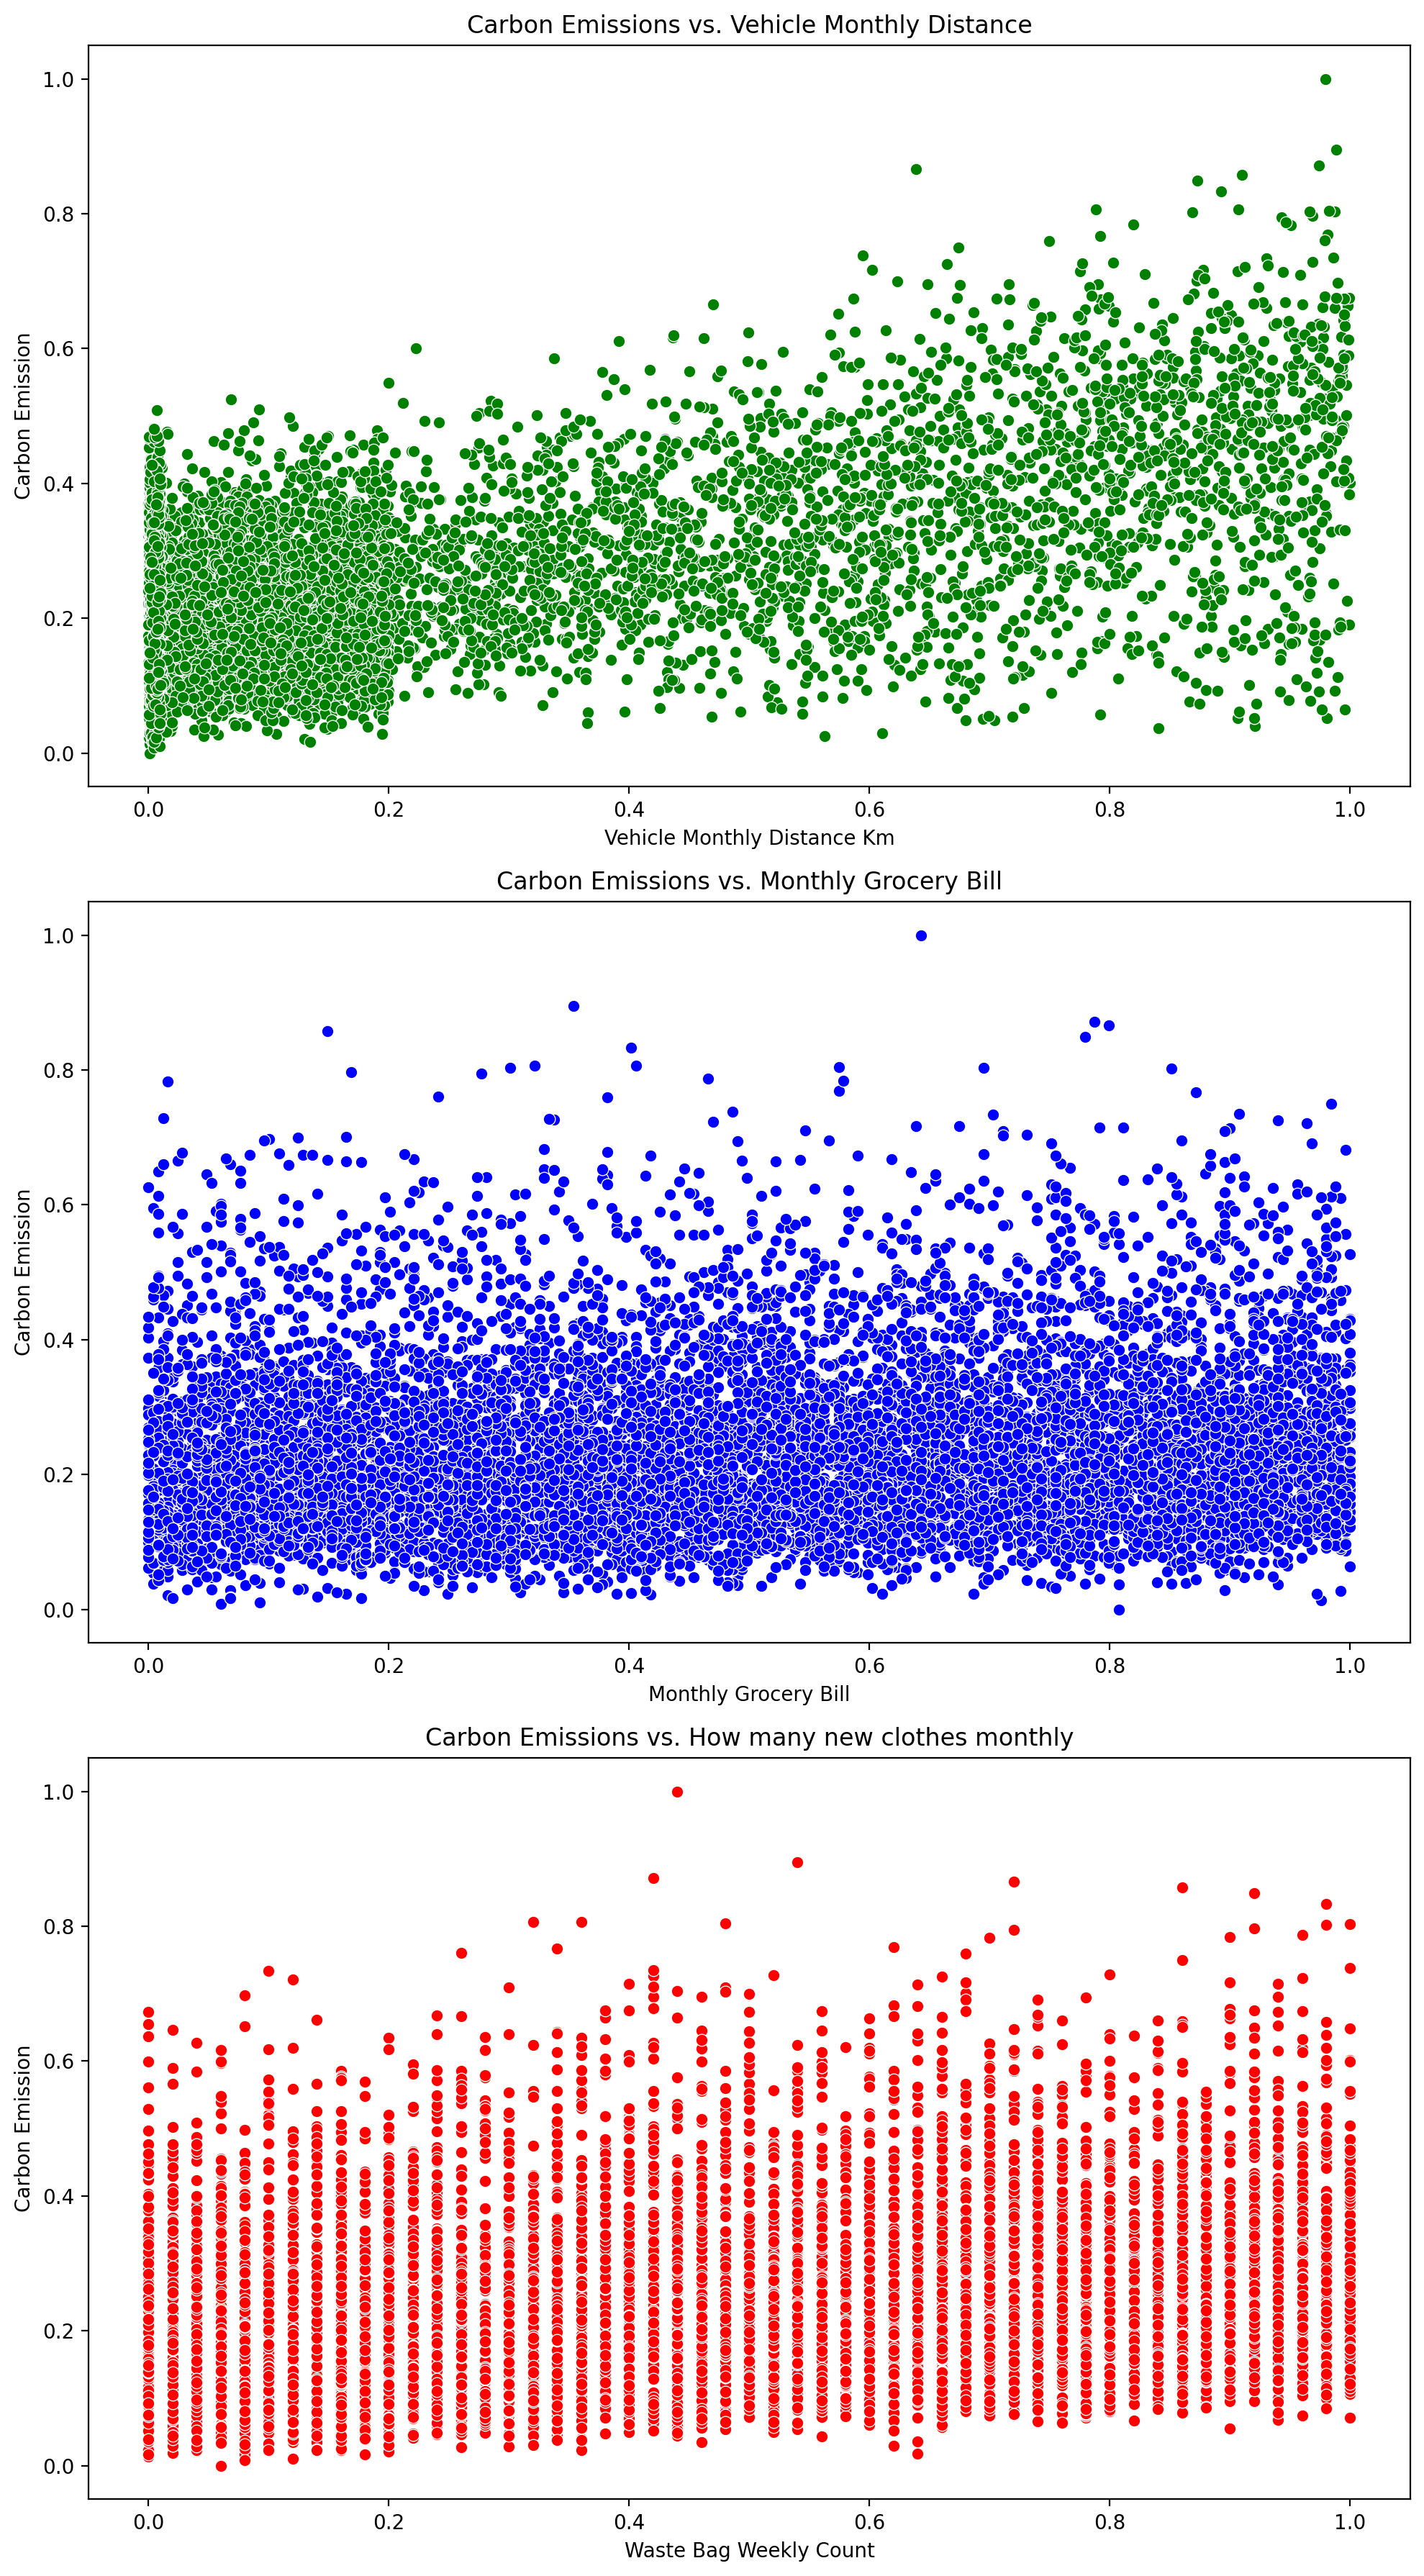


After choosing the features,  Isolation Forest was performed to detect outliers in the dataset. From the isolation forest model, 5 samples were detected as outliers.

the model ewas fit originaly with 5 clusters using K-Means clustering algorithm on the scaled, standardized features. This clustered the data into 5 distinct groups. and the centroids array positions were:

array([[0.17513207, 0.05661657, 0.25863636],<br>
       [0.2424048 , 0.05198125, 0.84479042],<br>
       [0.19378818, 0.04383614, 0.43854077],<br>
       [0.21897574, 0.05627948, 0.6446789 ],<br>
       [0.16960509, 0.05190889, 0.07555556]])<br>


Initial clustering k=5 
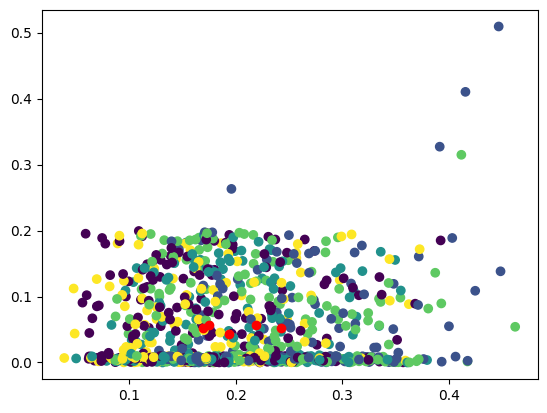


After this, cdist was implemented to compute distances between points, and the elbow method determined the optimal number of clusters for k-means = 3. Even so the model seemed to work better with K=5, perhaphs due to many close 0 values in the data. 

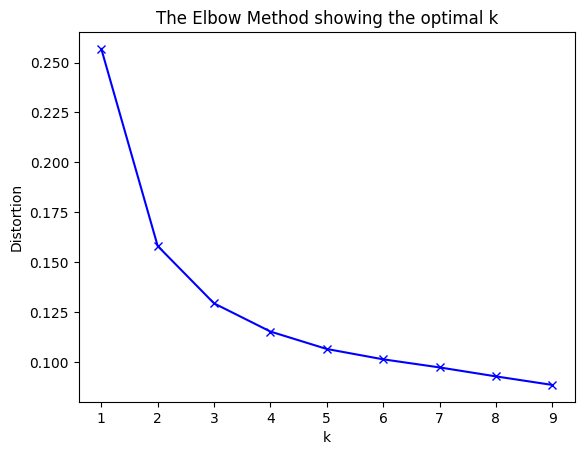

The cluster distribution results:<br>

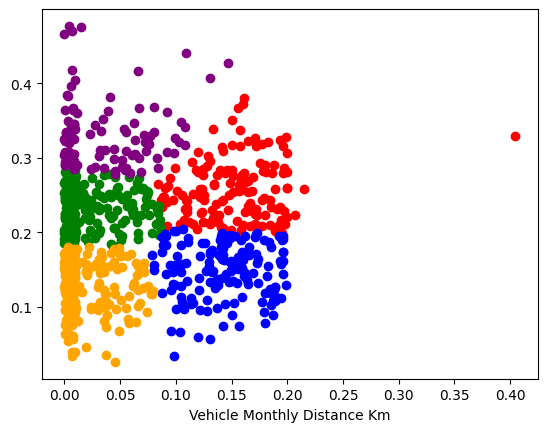<br>

The percentages: <br>

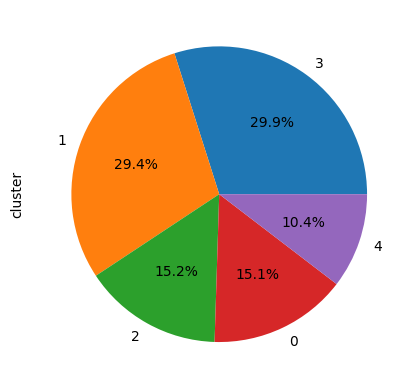

Nest step was to apply PCA, and try to reduce K to 3.<br> 

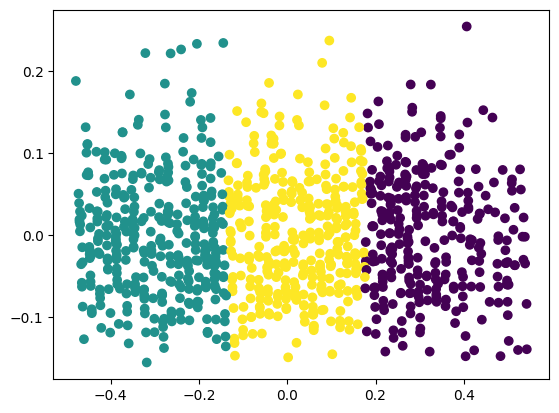<br>

This process gave a silhouette score of 0.4096.<br> 

Folling this, DBSCAN clustering was applied to the PCA reduced data <br>

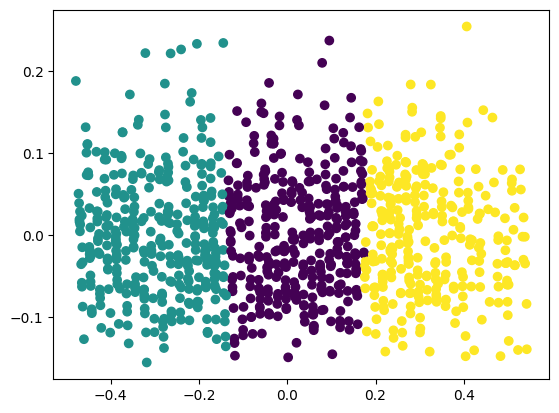

The new silouethe scare was 0.4628, which was an improvement over K-Means. This showed DBSCAN was slightly able to better cluster the data in a lower dimension after PCA.

The new percentages distribution of clusters was:  <br>

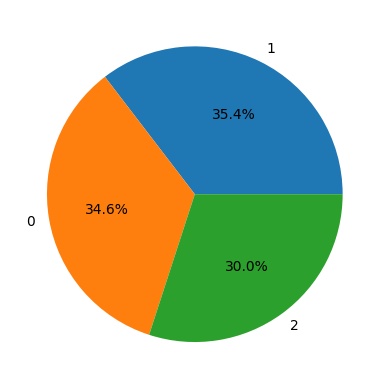

This showed that DBSCAN was able to detect 3 clusters in the reduced 3D PCA 

After this to have a quick look, a basic Keras Neural Network model was built and trained on the data:



* dense_1: A layer with 256 neurons.
* dense_11: A layer with 512 neurons.
* dense_12: Another layer with 512 neurons.
* dense_13: Yet another layer with 512 neurons.
* dense_14: The final layer with 1 neuron (output layer). 

* Trainable params: 662529 (2.53 MB) that the model adjusts during training.
* Non-trainable params:0, hence all the parameters will be updated during training.

* *The Neural Network showed the lowest MAE in 50 epochs:  119.7387980041504*, lowest than all linear models 



<span style="color:blue">**CONCLUSSIONS AND RECOMENDATIONS**</span><br>

From the point of view of the regression models tested, 


When dealing with mathematically linked  targets or dependant variable, we can have some advantages, such as interpretability, so it is helpful to understand how changes in independent variables impact the target variable. though if the relationship is too close to the training data, it will be overfitting. <br>

From the point of view of Kmeans model results:<br>

For a customer classification problem,  Kmeans works better and provide a good starting point to understand natural groupings in the data,
Though, it does not directly provide prediction scores per se, like regression models, the cluster assignments can be used as features for machine learning tasks like customer classification.<br>




<span style="color:blue">**APPLICATIONS AND FURTHER CLASSIFICATION**</span><br>

LINEAR REGRESSION MODEL:   <BR>

 This model is well-suited for creating a carbon footprint calculator, which is already done. but this model could be turned into a free app that connects with environmental NGOs. Users could check their monthly carbon footprint, and if they exceed it, they’d have the option to donate to the NGO to offset their CO2 emissions. This creates awareness and incentivizes reducing footprint over time.


KMeans and TARGET MARKETING:<BR>

* Customers in a segment with high carbon emissions can be targeted with Eco friendly products or services that can help them reduce their carbon footprint.<br>


* Segment that is characterized by frequent use of vehicles can be offered incentives for using public transportation or carpooling services, or emission reducing products for the car engine, that might increase satisfaction within this group.<br>

FURTHER CLASSIFICATION: <br>

Classification vegan diet and low carbon emissions, can be offered a new line of eco-friendly, plant-based products might be well-received by this group.

EDUCATION AND AWARENESS:<br> 

Segments with an interest in sustainability or environmental causes could be targeted with educational materials If a segment has a high carbon footprint due to certain behaviors (like certain cooking methods), educational programs or incentives could be designed to promote more sustainable practices.



<span style="color:blue">**FINAL THOUGHTS**</span><br>

In this project, I have demonstrated my proficiency to collect, resume data from online sources, and perform analysis, visualizations, and feature engineering. I extracted meaningful insights from the data to identify trends and patterns. This project has strengthened my skills in Python, Pandas, Matplotlib and reinforced core concepts in data science like EDA, feature engineering, and data visualization. I look forward to applying these skills to solve real -world problems and gain deeper expertise in machine learning.
Further exploration of more advanced ML algorithms like neural networks could potentially yield better predictions. Overall, this was a good learning experience in applying the data science<br>